<br><br>

<center><font size="7" color="purple">Sympy</font></center>

<br><br>

Sympy is short for Symbolic Python and is one of 3 important libraries for doing math in Python (scipy and numpy are the other 2).  Click on any of the links below to jump to a topic of interest.



### Table of Contents

* [Symbols](#symbols)
* [Basics](#basics)
    * [Derivative](#derivative)
    * [Integral](#integral)
    * [Limit](#limit)
    * [Factor Expand](#factor_expand)
* [Solving Stuff](#solving)
    * [Parameter Review](#parameters)
    * [Undefined Function](#undeffunc)
    * [Equality](#eq)
    * [Solvers](#solvers)
    * [Differential Equations](#odes)
* [Rendering Output](#render)
    * [plot](#plot)
    * [pprint](#pprint)
    * [latex_to_png](#latex_to_png)
    * [latex](#latex)
    * [init_printing](#init_printing)  
* [More](#more)
    * [L'Hopitals Rule](#lhopital)
    * [Projectiles](#projectile)
    * [Even More](#morefuncs)



<br><br><br>

<center><font size="5" color="blue">Symbols<a class="anchor" id="symbols"></a></font></center>

<br><br>



In [217]:
import sympy             # individual methods not imported explicitly so the code will prefix each call with "sympy."

x = sympy.Symbol('x')    # technically you could say a = Symbol('x') but that would be confusing
x+x+1

2*x + 1

<br>

Various mathematical symbols can be *sympified* and displayed

<br>

In [218]:
theta = sympy.Symbol('theta')
theta

theta

In [219]:
alpha = sympy.Symbol('alpha')
alpha

alpha

In [220]:
x,y,z=sympy.symbols('x,y,z')

<br>

sympify creates complex expressions of symbols. Note this does <b><i>not</i></b> create symbos for A and B.

<br>

In [221]:
str_expr = "A**2 + B*x - 1/2"
expr = sympy.sympify(str_expr)   # sympy.core.add.Add
expr

A**2 + B*x - 1/2

<br>

this returns a tuple of symbols but its pretty confusing
`sympy.symbols('x(1:4)')`

<br>
 
 You can set a variable to a number and solve...
 
 <br>

In [222]:
y = x * 3

y.subs(x, 2)

6

<br>
Also note `x=3` would turn `x` from a Symbol to an Integer and have on effect on `expr`
<br>
To test an expression for example if $(6 == x*3)$
<br>

In [223]:
# sympy.Eq(6,y)
6==y.subs(x, 2)

True

<br>
in sympy, this would be false because the "equations" are different
`(x + 1)**2 == x**2 + 2*x + 1`
<br>
But the equals() function can tell you if they are equal
<br>

In [224]:
a=(x + 1)**2             # sympy.core.power.Pow
b=x**2 + 2*x + 2         # sympy.core.add.Add
a.equals(b)

False


An equation such as $5t^2+2t+8$ stored in a string is *sympified* into a <b><ul>sympy.core</ul></b> object,
either sympy.core.add.Add, sympy.core.mul.Mul or sympy.core.pow.Pow.

<br>
An equations may be in 4 object types and it helps to understand this
<br>

* sympy.core                                     Add, Mul,Pow

* sympy.core.relational.Equality

* sympy.core.function.UndefinedFunction

* str                                           which includes latex expressions






<br><br><br>

<center><font size="5" color="blue">Calculus Basics<a class="anchor" id="basics"></a></font></center>

<br><br>

You can create and object but usually its enough to call the static method...

<br>

<table>
  <tr>
    <th>Object</th>
    <th>Method</th>
  </tr>
  <tr>
    <td>Derivative</td>
    <td>diff</td>
  </tr>
  <tr>
    <td>Integration</td>
    <td>integrate</td>
  </tr>
   <tr>
    <td>Limit</td>
    <td>limit</td>
  </tr>
</table>




<font size="4" color="red">Derivative</font><a class="anchor" id="derivative"></a>


<br>
lets start with with a simple derivative
<br>

$$5t^2+2t+8$$

<br>

Derivative() only creates an object from which you can evaluate it...

In [225]:
t = sympy.Symbol('t')
St = 5*t**2 + 2*t + 8       # St is of type sympy.core.add.Add

d = sympy.Derivative(St, t)  # d is of type sympy.core.function.Derivative

d.doit()  

10*t + 2

<br>

a shortcut way is to use diff

<br>


In [226]:
sympy.diff(St)

10*t + 2

<br>

both return a sympy.core.add.Add object

<br>

<br>

With the deriviative object, you can substitute a number or even another symbol...

<br>

In [227]:
d.doit().subs({t:4.5})  

47.0000000000000

In [228]:
d.doit().subs({t:x})   

10*x + 2

<br>

To evaluate $f^{\prime \prime \prime} (x^4)$

<br>

In [229]:
sympy.diff(x**4,x,x,x)
# diff(x**4,x,3)          # same thing

24*x

<br>


<font size="4" color="red">Integral</font><a class="anchor" id="integral"></a>

<br>

The Derivative() and Integral() functions take equations in any object type

<br>

In [230]:
i=sympy.Integral(d)              # Derivative object
print(i.doit())                 
i=sympy.Integral(d.doit())         # core.Add object
print(i.doit())
i=sympy.Integral(St)               # str
print(i.doit())

5*t**2 + 2*t
5*t**2 + 2*t
5*t**3/3 + t**2 + 8*t


<br><br>

<font size="4" color="red">Limit</font><a class="anchor" id="limit"></a>

<br>

$$\lim_{x \to \infty} \ \frac{x^2}{5}$$

<br>


In [231]:
expr = x**2/5

l = sympy.limit(expr, x, sympy.S.Infinity)       # type is sympy.core.numbers.Infinity
print(l)
l = sympy.Limit(expr, x, sympy.S.Infinity)        # type is sympy.series.limits.Limit
print(l.doit())

oo
oo


<br>

S is a static class (short for Singleton) and provides a variety of members

<br>

Lets do eulers number...

<br>

$$\lim_{x \to \infty} \ \left(1 + \frac{1}{x}\right)^x$$

<br>



In [232]:
sympy.limit((1+1/x)**x, x, sympy.S.Infinity)            # type is sympy.core.numbers.Exp1

E


<br>

the dir='-' symbol specifies we are approaching from the negative side

<br>


In [233]:

sympy.Limit(1/x, x, 0, dir='-').doit()


-oo


<br>

<font size="4" color="red">Factor and Expand</font><a class="anchor" id="factor_expand"></a>


<br>

The Difference of Squares rule is ...
$$x^2-y^2 = (x - y)(x + y)$$

<br>

factor() can be used to factor from the left to the right

<br>

In [234]:
y = sympy.Symbol('y')
expr = x**2 - y**2
sympy.factor(expr)          # sympy.core.mul.Mul

(x - y)*(x + y)

<br>

On the opposite, expand() can be used to return it back.

<br>

In [235]:
e =sympy.factor(expr)   # sympy.core.mul.Mul
sympy.expand(e)         # sympy.core.add.Add

# again note the functions can accept different types of sympy objects

x**2 - y**2



<br><br>


<center><font size="5" color="blue">Solving Stuff<a class="anchor" id="solving"></a> </font></center>

<br><br>
 
 
 <br>

<font size="4" color="red">Parameter Review :<a class="anchor" id="parameters"></a> </font>

<br>

A function like Derivative() can take an *expression* as a

<pre>
        1) String
        2) sympy.core object
        3) Derivative/Integral object
        4) sympy.core.function.UndefinedFunction object
</pre>

<br>

the important thing to note is they are all considered to solve to 0.

<br>


Other solvers expect an *Equality* object in which you explicitly set both the LHS and the RHS.

 
 <br>
 
 For example, these would fail...
 
 <br>
 
 `sympy.Integral(eq1)`   # no good eq1 is an Equation object
 
 `sympy.dsolve(d)`     # no good d is a Deriviative object
 
 <br>
 
 Here Integral() takes 3 different object types...
 
 <br>

In [236]:
sympy.Integral(d)      # d is sympy.core.function.Derivative

Integral(Derivative(5*t**2 + 2*t + 8, t), t)

In [237]:
sympy.Integral( 5*x**2 +2*x+8 )        # sympy.core.add.Add

Integral(5*x**2 + 2*x + 8, x)

<br>

Here we pass a string. Also note the exponent, sympy usually requires ** but here ^ works...

<br>

In [238]:
sympy.Integral("5*x^2 +2*x+8")

Integral(5*x**2 + 2*x + 8, x)

<br>

for definite integrals, just pass the range...

<br>
$$\int_0^{\infty} e^{-x} dx$$

<br>


In [239]:
sympy.integrate(sympy.exp(-x), (x,0,sympy.S.Infinity))

1


<br>

<font size="4" color="red">Undefined Function :<a class="anchor" id="undeffunc"></a> </font>

<br>



 <br>

The Function() function returns an object of type sympy.core.function.UndefinedFunction

<br>

It has no code

<br>


In [240]:
f = sympy.Function('f')
f(x)



f(x)

<br>

Another way of doing it

<br>

In [241]:
f = sympy.symbols('f', cls=sympy.Function)
f(x)

f(x)

 <br>
 
 diff or Integral() work on it and return a Derivative or Integral object
 
 <br>

In [242]:
dfdt = sympy.diff(f(t), t)
dfdt 

Derivative(f(t), t)

In [243]:
sympy.Integral(f(t))

Integral(f(t), t)

In [244]:
sympy.Derivative(f(t))

Derivative(f(t), t)

 <br>
 
 <font size="4" color="red">Equality :<a class="anchor" id="eq"></a> </font>
 
 <br>


In [245]:
eq1 = sympy.Eq(dfdt, alpha*f(t))   #  eq1 is of type sympy.core.relational.Equality
eq1

Eq(Derivative(f(t), t), alpha*f(t))

In [246]:
solution_eq = sympy.dsolve(eq1)
solution_eq

Eq(f(t), C1*exp(alpha*t))

 <br>
 
 <font size="4" color="red">4 Solvers :<a class="anchor" id="solvers"></a> </font>
 
 <br>
 
 
 We will look at 4 solvers starting with solveset.
 
 <br>
 
 $$(x+3)(x-5)=-7$$


In [247]:
e=x**2 -2*x -15
sympy.solveset(sympy.Eq(e , -7), x)

FiniteSet(-2, 4)

In [248]:
sympy.solveset(sympy.Eq(e , 0), x)

FiniteSet(-3, 5)

<br>

solve just assumes you are solving for 0 and is the way we find roots

<br>

In [249]:
sympy.solve(e)

[-3, 5]

<br>

solve finds roots where the equation evaluates to zero

<br>

In [250]:
a,b,c = sympy.symbols('a,b,c')
e = a * x**2 + b * x + c
sympy.solve(e) 

[{a: -(b*x + c)/x**2}]

<br>

If there are no solutions, an EmptySet is returned and if it is not able to find solutions then a ConditionSet is returned.

<br>

Note the upside down v can be either \wedge or \land and represents LogicalAnd so i guess its saying
that x is in the Complex number set and the indicated equation equals 0

<br>

In [251]:
s=sympy.solveset(sympy.cos(x) - x, x)  # Not able to find solution ... sympy.sets.conditionset.ConditionSet
print(sympy.latex(s))
s

\left\{x \mid x \in \mathbb{C} \wedge - x + \cos{\left(x \right)} = 0 \right\}


ConditionSet(x, Eq(-x + cos(x), 0), Complexes)

<br>

linsolve solves linear equations and can do so on matrices

<br>

In [252]:
sympy.linsolve([x + y + z - 1, x + y + 2*z - 3 ], (x, y, z))
# linsolve(Matrix(([1, 1, 1, 1], [1, 1, 2, 3])), (x, y, z))             # same thing

FiniteSet((-y - 1, y, 2))

<br>

use nonlinsolve for non-linear equations, note if there are infinite solutions then the variable is returned

<br>

In [253]:
sympy.nonlinsolve([x*y, x*y - x], [x, y])

FiniteSet((0, y))

<br>

<font size="4" color="red">Differential Equations :<a class="anchor" id="odes"></a> </font>

<br>

$$\frac{d}{dx} f(x) = f(x)$$

<br>

is considered an ODE

<br>

In [254]:
x = sympy.symbols('x') 
f = sympy.Function('f')
d = sympy.diff(f(x),x)         # derivative of f(x)
deq = sympy.Eq(d,f(x))         # 
xsoln = sympy.dsolve(deq, f(x)) 
xsoln

Eq(f(x), C1*exp(x))

In [255]:
# this function can describe the ode ( in this case its quite verbose )
# sympy.classify_ode(deq)

y = sympy.Function('y')(x) 

# note f is an Undefined Function, f is of type f and  y is of type y
dy_dx = sympy.Derivative( y, x )
dy_dx

Derivative(y(x), x)

<br>
Lets say you have 

<br>

$$\frac{dy}{dx}=y$$

<br> 

In [258]:
ode = sympy.Eq(dy_dx, y)
sympy.dsolve(ode, y)

Eq(y(x), C1*exp(x))

We can avoid using Eq() by setting the ODE to 0
<br>
 
$$\frac{dy}{dx}-y=0$$ 

<br> 

In [259]:
ode = dy_dx - y 
ode

-y(x) + Derivative(y(x), x)

In [260]:
sympy.dsolve(ode, y) 

Eq(y(x), C1*exp(x))




<br><br>

<center><font size="5" color="blue">Rendering Output<a class="anchor" id="render"> </font></center>

<br><br>


<br>

sympy has its own version of plot (wrapper on matplotlib)

<br>

<font size="4" color="red">Plot</font><a class="anchor" id="plot"></a>

<br>


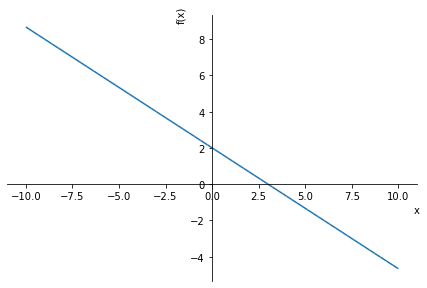

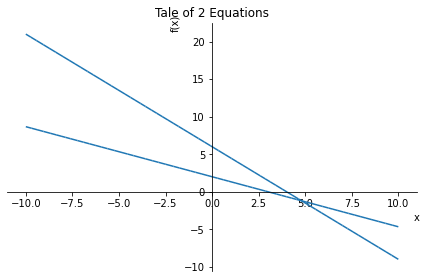

In [261]:
%matplotlib inline

cexpr1 = 2*x + 3*y - 6
cexpr2 = 3*x + 2*y - 12
sympy.solve((cexpr1, cexpr2), dict=True)  

yexpr1 = sympy.solve(cexpr1,y)        # returns a list

sympy.plot(sympy.sympify(yexpr1[0]))

yexpr2 = sympy.solve(cexpr2,y)        # returns a list
    # you can pass multiple equations to plot
    # they sympy plot does not require show()
sympy.plot(sympy.sympify(yexpr1[0]),sympy.sympify(yexpr2[0]), title="Tale of 2 Equations")


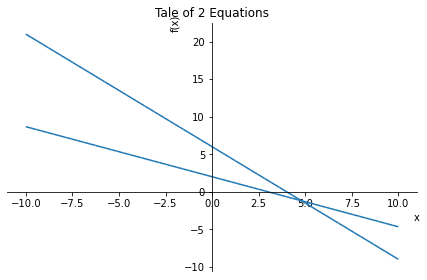

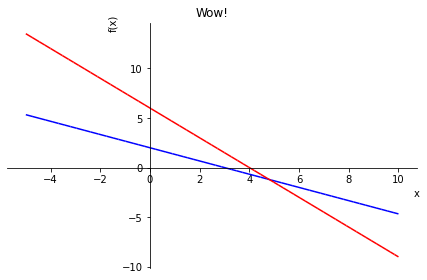

In [262]:
# however you can create a plot object which offers functionality
p = sympy.plot(sympy.sympify(yexpr1[0]),sympy.sympify(yexpr2[0]), title="Tale of 2 Equations")
p[0].start=-5
p[1].start=-5
p[0].line_color = 'b'
p[1].line_color = 'r'
p.title="Wow!"
p.show()


 <br>
 <br>

<font size="4" color="red">pprint</font><a class="anchor" id="plot"></a>

<br>

print(yexpr1) and pprint() all are ok...just ok, it depends 
 
 <br>

In [263]:
sympy.pprint(yexpr1)        # not that great

⎡    2⋅x⎤
⎢2 - ───⎥
⎣     3 ⎦


In [264]:
yexpr1            # better than pprint ?

[2 - 2*x/3]

In [265]:
print(yexpr1)      # the worst ?

[2 - 2*x/3]


In [266]:
n=5
x = sympy.Symbol('x')
series = x
for i in range(2, n+1):
    series = series + (x**i)/i

sympy.pprint(series)    
    

 5    4    3    2    
x    x    x    x     
── + ── + ── + ── + x
5    4    3    2     


In [267]:
series        # better ?

x**5/5 + x**4/4 + x**3/3 + x**2/2 + x


 <br>
 
 
<font size="4" color="red">latex_to_png</font><a class="anchor" id="latex_to_png"></a>

<br>


In [268]:
alpha = sympy.symbols('alpha')

from IPython.display import display, Image
from IPython.lib.latextools import latex_to_png

def disp(expr):
    data = latex_to_png(sympy.latex(expr), color='Green' , wrap=True)
    display(Image(data=data))

disp(yexpr1)
disp(alpha + theta)


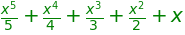

In [269]:
disp(series)


 <br>
 <br>

<font size="4" color="red">Latex</font><a class="anchor" id="latex"></a>

<br>

 latex() creates a textual latex representation. its a string but you can copy it and use it
 
 <br>

In [270]:
print(sympy.latex(yexpr1))

\left[ 2 - \frac{2 x}{3}\right]



 <br>
 
 You want to use print() because latex escapes backslashes and you want to remove the extra backslash
 
 <br>

 
 $$\left[ 2 - \frac{2 x}{3}\right]$$
 
<br>
print_mathml() is the math latex and might be useful

<br>
lastly init_printing() and init_session() dont seem too useful

<br>


<br><br>

<center><font size="5" color="blue">More<a class="anchor" id="more"></a> </font></center>

<br><br>


<br><br><br>

<b>L'Hopitals Rule</b><a class="anchor" id="lhopital"></a>

<br><br>


if we have an indeterminate form $\frac{0}{0}$ or $\frac{\infty}{\infty}$
then we can take the derivative of the denominator and numerator.

<br>
$$\lim_{x \to \infty} \ \frac{sin(\theta)}{\theta}$$

<br>


In [271]:

# note this is sympy sin not Math.sin
sympy.Limit(sympy.sin(x)/x, x, 0).doit() 


1




<br>

<b>Projectile Motion</b><a class="anchor" id="projectile"></a>

<br><br>

the velocity equation is
<br>

$$v_y \ = \ \frac{V_0*sin(\theta)}{g*T}$$

<br>



<br>
solving for the time at maximum height (the root where displacement = 0 ) gives us ...

<br>

$$T \ = \ \frac{V_0 *sin(\theta)}{g}$$
<br>
 

In [272]:
u = sympy.Symbol('u')
t = sympy.Symbol('t')
g = sympy.Symbol('g')
theta = sympy.Symbol('theta')
expr=u*sympy.sin(theta)-g*t       # sympy.core.add.Add
sympy.solve(expr, t)


[u*sin(theta)/g]



<br><br>


<b>More Functions</b><a class="anchor" id="morefuncs"></a>

Expressions can be evaluated with either evalf ( for floats ) or subs (for integer)

<br>

In [273]:
expr = x**2 + 4*x -4
print(expr.evalf(subs={x:3}))
print(expr.subs(x,3))

17.0000000000000
17


<br>

expand and factor ...

<br>

$$x^{2} + 2 x + 1 = (x+1)(x+1)$$ 

<br>

In [276]:
f = sympy.expand((x + 1)**2)
print(f)
print(sympy.factor(f))

x**2 + 2*x + 1
(x + 1)**2


<br>

expand_trig ...

<br>

In [277]:
expr = sympy.sin(2*x) + sympy.cos(2*x)
sympy.expand_trig(expr)

2*sin(x)*cos(x) + 2*cos(x)**2 - 1

<br>

sympify (not simplify) converts a non sympify object to a sympify object

<br>

In [278]:
a,b,c = sympy.symbols('a,b,c')
str = "a * x**2 + b * x + c"
sympy.sympify(str)           # sympy.core.add.Add
# equivalent to sym_exp = a * x**2 + b * x + c

a*x**2 + b*x + c

<br>
simplify (not sympify) can simplify equations. cancel() does too but seems to imply its a fraction

<br><br>

$$x-1 = \frac{x^3 + x^2 - x -1}{x^2 + 2x+1}$$

<br><br>


In [279]:
e = (x**3 + x**2 - x - 1)/(x**2 + 2*x + 1)
print(sympy.simplify(e))
print(sympy.cancel(e))

x - 1
x - 1


<br>

the Derivative object offers a few other things

<br>

In [280]:
# d.as_base_exp()          # tuple           (Derivative(5*t**2 + 2*t + 8, t), 1)
# d.variables              # tuple           (t,)

d.as_poly()              # sympy.polys.polytools.Poly

Poly(Derivative(f(x), x), Derivative(f(x), x), domain='ZZ')